In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
library(ggplot2)
library(patchwork)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "age-dataset"

In [2]:
age_death_df <- read.csv("../input/age-dataset/AgeDataset-V1.csv")

In [3]:
age_death_df <- age_death_df %>% mutate_all(na_if,"")

In [4]:
head(age_death_df)

,Id,Name,Short.description,Gender,Country,Occupation,Birth.year,Death.year,Manner.of.death,Age.of.death
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Britain,Politician,1732,1799,natural causes,67
2,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49
3,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56
4,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NA,35
5,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NA,57
6,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832,natural causes,42


In [5]:
sum(is.na(age_death_df))

[1] 1913377

In [6]:
glimpse(age_death_df)

Rows: 1,223,009
Columns: 10
$ Id                <chr> "Q23", "Q42", "Q91", "Q254", "Q255", "Q260", "Q272",…
$ Name              <chr> "George Washington", "Douglas Adams", "Abraham Linco…
$ Short.description <chr> "1st president of the United States (1732–1799)", "E…
$ Gender            <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Mal…
$ Country           <chr> "United States of America; Kingdom of Great Britain"…
$ Occupation        <chr> "Politician", "Artist", "Politician", "Artist", "Art…
$ Birth.year        <int> 1732, 1952, 1809, 1756, 1770, 1790, 1888, 1840, 1599…
$ Death.year        <int> 1799, 2001, 1865, 1791, 1827, 1832, 1976, 1926, 1660…
$ Manner.of.death   <chr> "natural causes", "natural causes", "homicide", NA, …
$ Age.of.death      <int> 67, 49, 56, 35, 57, 42, 88, 86, 61, 73, 42, 78, 98, …


In [7]:
unique(age_death_df$Occupation)

[1] "Politician"                                                                                                             
   [2] "Artist"                                                                                                                 
   [3] "Egyptologist"                                                                                                           
   [4] "Astronomer"                                                                                                             
   [5] "Ruler"                                                                                                                  
   [6] "Statesperson"                                                                                                           
   [7] "Regent"                                                                                                                 
   [8] "Athlete"                                                                                                                
   [9] "Researcher"                                                                                                             
  [10] "Official; french resistance fighter"                                                                                    
  [11] "Sovereign"                                                                                                              
  [12] "Playwright"                                                                                                             
  [13] "Military personnel"                                                                                                     
  [14] "Philosopher"                                                                                                            
  [15] "Businessperson"                                                                                                         
  [16] "Game designer; role-playing game designer"                                                                              
  [17] "Explorer"                                                                                                               
  [18] "Architect"                                                                                                              
  [19] "Teacher"                                                                                                                
  [20] "Activist"                                                                                                               
  [21] "Aristocrat"                                                                                                             
  [22] "Racing automobile driver"                                                                                               
  [23] "Entrepreneur"                                                                                                           
  [24] "Motorcycle racer; formula one driver"                                                                                   
  [25] "Formula one driver"                                                                                                     
  [26] "Journalist"                                                                                                             
  [27] "Geographer; explorer"                                                                                                   
  [28] "Monarch"                                                                                                                
  [29] "Business executive"                                                                                                     
  [30] "Racing automobile driver; formula one driver"                                                                           
  [31] "Engineer"                                                                                                               
  [3

In [8]:
age_death_df %>%
        group_by(Occupation) %>%
        tally(sort=T)

Occupation,n
<chr>,<int>
Artist,281512
NA,206914
Politician,195390
Athlete,110943
Researcher,90709
Military personnel,52911
Religious figure,37086
Businessperson,19529
Architect,17865


In [9]:
# Filter for some interesting occupations with high count
filtered_occupation <- age_death_df %>%
        filter(Occupation == c("Artist","Politician","Athete","Researcher","Military personnel","Religious figure")) %>%
        select(-Id,-Short.description,-Name)
        

Warning message in Occupation == c("Artist", "Politician", "Athete", "Researcher", :
“longer object length is not a multiple of shorter object length”


In [10]:
filtered_occupation$Occupation <- as.factor(filtered_occupation$Occupation)

In [11]:
str(filtered_occupation)

'data.frame':	109650 obs. of  7 variables:
 $ Gender         : chr  "Male" "Male" "Male" "Male" ...
 $ Country        : chr  "France" "Byelorussian Soviet Socialist Republic; Russian Empire; Belarusian People's Republic" "France" "France" ...
 $ Occupation     : Factor w/ 5 levels "Artist","Military personnel",..: 1 1 1 1 5 1 1 1 3 5 ...
 $ Birth.year     : int  1888 1882 1821 1802 1719 1524 1844 1891 1858 1899 ...
 $ Death.year     : int  1976 1942 1867 1885 1786 1580 1896 1940 1930 1986 ...
 $ Manner.of.death: chr  NA NA "natural causes" NA ...
 $ Age.of.death   : int  88 60 46 83 67 56 52 49 72 87 ...


In [12]:
filtered_total <- na.omit(filtered_occupation)

In [13]:
str(filtered_total)
sum(is.na(filtered_total))

'data.frame':	5115 obs. of  7 variables:
 $ Gender         : chr  "Male" "Male" "Male" "Male" ...
 $ Country        : chr  "France" "France" "Soviet Union; Russian Empire" "Argentina" ...
 $ Occupation     : Factor w/ 5 levels "Artist","Military personnel",..: 1 1 1 5 1 1 3 3 1 1 ...
 $ Birth.year     : int  1821 1844 1891 1899 1800 1940 1917 1878 1902 1935 ...
 $ Death.year     : int  1867 1896 1940 1986 1849 1980 1989 1944 1974 2004 ...
 $ Manner.of.death: chr  "natural causes" "natural causes" "natural causes" "natural causes" ...
 $ Age.of.death   : int  46 52 49 87 49 40 72 66 72 69 ...
 - attr(*, "na.action")= 'omit' Named int [1:104535] 1 2 4 5 6 9 11 13 14 16 ...
  ..- attr(*, "names")= chr [1:104535] "1" "2" "4" "5" ...


[1] 0

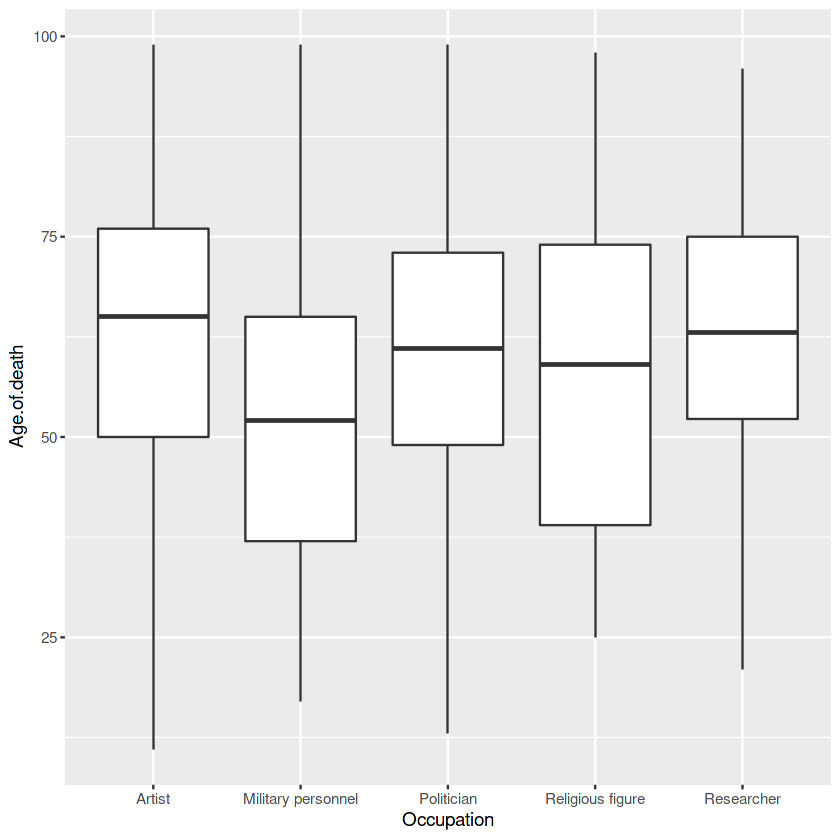

In [14]:
ggplot(filtered_total, aes(x=Occupation, y=Age.of.death)) +
geom_boxplot()

### What is the distribution of the "age of death" for each selected occupation?

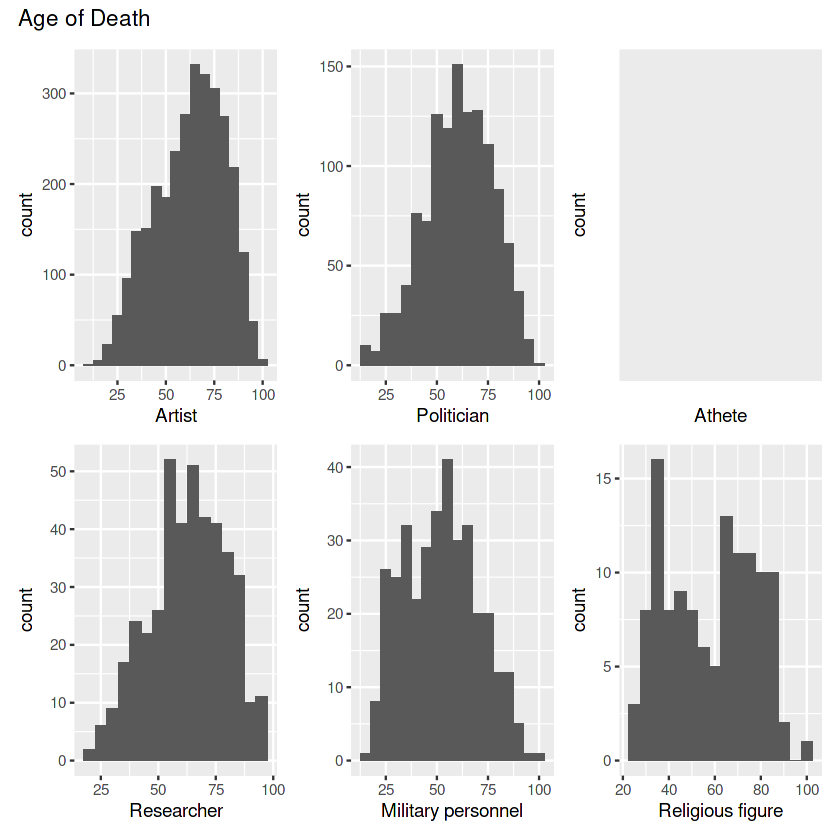

In [15]:
hist1 <- filtered_total %>%
    filter(Occupation == "Artist") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Artist")

hist2 <- filtered_total %>%
    filter(Occupation == "Politician") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Politician")

hist3 <- filtered_total %>%
    filter(Occupation == "Athete") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Athete")

hist4 <- filtered_total %>%
    filter(Occupation == "Researcher") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Researcher")

hist5 <- filtered_total %>%
    filter(Occupation == "Military personnel") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Military personnel")

hist6 <- filtered_total %>%
    filter(Occupation == "Religious figure") %>%
    ggplot(aes(x=Age.of.death)) +
    geom_histogram(binwidth=5) +
    xlab("Religious figure")

hist1 + hist2 + plot_annotation(title="Age of Death") + hist3 + hist4 + hist5 + hist6